<a href="https://colab.research.google.com/github/RuqsarFirdous/PREDICTIVE-ANALYSIS-USING-MACHINE-LEARNING/blob/main/task2__part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For pretty plots
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Loading the files data
flights=pd.read_csv("flights.csv")
print("Flights data:")
print(flights.head())

Flights data:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  

In [ ]:
# Loading the airlines data
airlines=pd.read_csv("airlines.csv")
print("Airlines data:")
print(airlines.head())

Airlines data:
  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways


In [ ]:
# Loading the airport data
airports=pd.read_csv("airports.csv")
print("Airports data:")
print(airports.head())

Airports data:
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  


In [ ]:
#Merge flights with airlines to get AIRLINE_NAME
flights=flights.merge(
    airlines,
    how='left',
    left_on='AIRLINE',
    right_on='IATA_CODE')

flights.rename(columns={
    "AIRLINE_x": "AIRLINE_CODE",
    "AIRLINE_y": "AIRLINE_NAME"
    },inplace=True)

In [ ]:
# Merge flights with airports to get ORIGIN CITY & STATE
flights = flights.merge(
    airports,
    how="left",
    left_on="ORIGIN_AIRPORT",
    right_on="IATA_CODE",
    suffixes=("", "_ORIGIN")
)
# Rename columns for clarity
flights.rename(columns={
    "CITY": "ORIGIN_CITY",
    "STATE": "ORIGIN_STATE"
}, inplace=True)


In [ ]:
# Quick check
print(flights[[
    "AIRLINE_CODE", "AIRLINE_NAME", "ORIGIN_AIRPORT", "ORIGIN_CITY", "ORIGIN_STATE"
]].head())

  AIRLINE_CODE            AIRLINE_NAME ORIGIN_AIRPORT    ORIGIN_CITY  \
0           AS    Alaska Airlines Inc.            ANC      Anchorage   
1           AA  American Airlines Inc.            LAX    Los Angeles   
2           US         US Airways Inc.            SFO  San Francisco   
3           AA  American Airlines Inc.            LAX    Los Angeles   
4           AS    Alaska Airlines Inc.            SEA        Seattle   

  ORIGIN_STATE  
0           AK  
1           CA  
2           CA  
3           CA  
4           WA  


### Create DELAYED column:

In [ ]:
# If departure delay > 15 minutes → mark as delayed (1), else 0

flights["DELAYED"]=flights["DEPARTURE_DELAY"].apply(
    lambda x:1 if x > 15 else 0
)
print(flights[["DEPARTURE_DELAY", "DELAYED"]].head())

   DEPARTURE_DELAY  DELAYED
0            -11.0        0
1             -8.0        0
2             -2.0        0
3             -5.0        0
4             -1.0        0


###  EDA (Exploratory Data Analysis).

####1️⃣ Check overall delay distribution

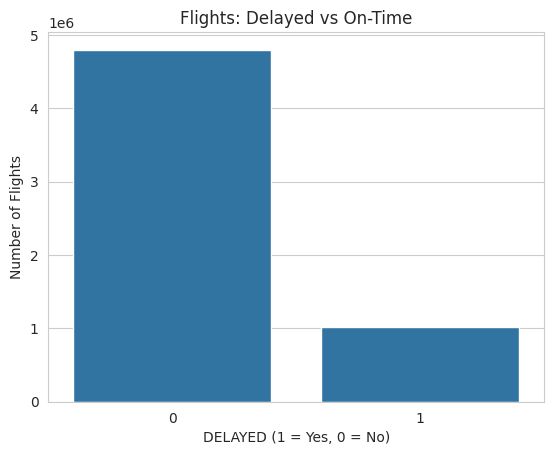

In [ ]:
sns.countplot(x="DELAYED",data=flights)
plt.title("Flights: Delayed vs On-Time")
plt.xlabel("DELAYED (1 = Yes, 0 = No)")
plt.ylabel("Number of Flights")
plt.show()

 #### 2️⃣ Check average departure delay by airline

In [ ]:
avg_delay=flights.groupby("AIRLINE_NAME")["DEPARTURE_DELAY"].mean().sort_values(ascending=False)
print(avg_delay)

AIRLINE_NAME
Spirit Air Lines                15.944766
United Air Lines Inc.           14.435441
Frontier Airlines Inc.          13.350858
JetBlue Airways                 11.514353
Southwest Airlines Co.          10.581986
American Eagle Airlines Inc.    10.125188
Virgin America                   9.022595
American Airlines Inc.           8.900856
Atlantic Southeast Airlines      8.715934
Skywest Airlines Inc.            7.801104
Delta Air Lines Inc.             7.369254
US Airways Inc.                  6.141137
Alaska Airlines Inc.             1.785801
Hawaiian Airlines Inc.           0.485713
Name: DEPARTURE_DELAY, dtype: float64


#### 3️⃣ See top origin cities

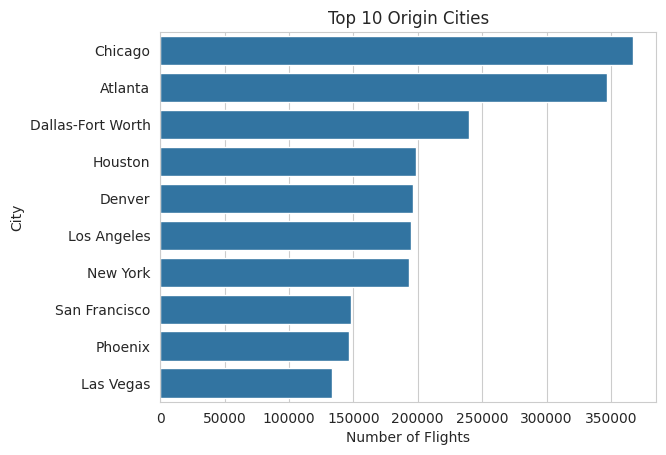

In [ ]:
# Top origin cities by number of flights
sns.countplot(y="ORIGIN_CITY", data=flights, order=flights["ORIGIN_CITY"].value_counts().iloc[:10].index)
plt.title("Top 10 Origin Cities")
plt.xlabel("Number of Flights")
plt.ylabel("City")
plt.show()


In [ ]:
flights.to_csv('flights_cleaned.csv', index=False)


###Conclusion (Part 1)

In this first part of my Flight Delays Analysis, I loaded three large CSV files — flights, airlines, and airports — and successfully merged them to create an enriched dataset with airline names and origin city/state information.

I handled missing values, created a new DELAYED column to mark flights with significant departure delays, and performed clear exploratory data analysis (EDA). The visualizations helped highlight patterns in delays by airline, city, and state, showing where and when delays are more common.

This sets up the data perfectly for building a predictive model in the next part.

✅ Data loading, merging, cleaning, and EDA are complete.
📌 Next: Encode features, train a model, and evaluate predictions.